In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.preprocessing import LabelEncoder

In [11]:
#get data
gdp = pd.read_csv('Unit04 Global_GDP.csv')
pop = pd.read_csv('Unit04 Global_Population.csv')

,Country Name,Country Code,Series Name,Series Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211,55438,56225,56695,57032,57360,...,102560,103159,103774,104341,104872,105366,105845,106314,NaN,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967,9169406,9351442,9543200,9744772,9956318,...,31161378,32269592,33370804,34413603,35383028,36296111,37171922,38041757,38928341,39835000
2,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130836765,134159786,137614644,141202036,144920186,148769974,...,547482863,562601578,578075373,593871847,609978946,626392880,643090131,660046272,677243299,694664000
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,96396419,98407221,100506960,102691339,104953470,107289875,...,370243017,380437896,390882979,401586651,412551299,423769930,435229381,446911598,458803476,470898000
4,Albania,ALB,"Population, total",SP.POP.TOTL,1608800,1659800,1711319,1762621,1814135,1864791,...,2900401,2895092,2889104,2880703,2876101,2873457,2866376,2854191,2837743,2832000


In [5]:
# replacing null values
gdp.fillna(gdp.median(), inplace = True)
pop.fillna(pop.median(), inplace= True)

C:\Users\JER\AppData\Local\Temp\ipykernel_23244\2354227957.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  gdp.fillna(gdp.median(), inplace=True)
C:\Users\JER\AppData\Local\Temp\ipykernel_23244\2354227957.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  pop.fillna(pop.median(), inplace=True)


In [6]:
pop.loc[:, '2001':'2020'] = pop.loc[:, '2001':'2020'].apply(pd.to_numeric, errors = 'coerce')

In [7]:
gdp_mean = gdp_df.loc[:, '2001':'2020'].mean(axis = 1)
pop_mean = pop_df.loc[:, '2001':'2020'].mean(axis = 1)

df = pd.DataFrame({'Country': gdp['Country Name'], 'Mean_GDP': gdp_mean, 'Mean_Population': pop_mean})

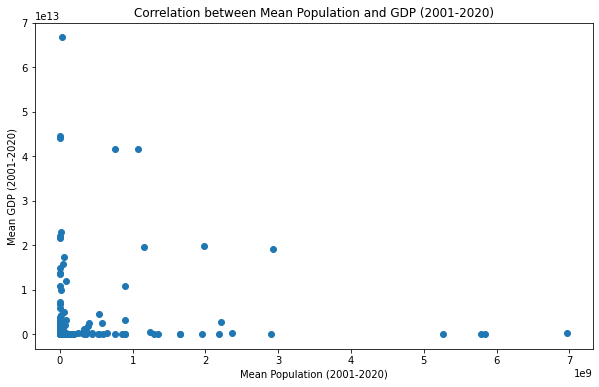

In [8]:
plt.figure(figsize = (10,6))
plt.scatter(df['Mean_Population'], df['Mean_GDP'])
plt.xlabel('Mean Population (2001-2020)')
plt.ylabel('Mean GDP (2001-2020)')
plt.title('Correlation between Mean Population and GDP (2001-2020)')
plt.show()

In [16]:
df.fillna(method="ffill", inplace = True)

corr, _ = pearsonr(df['Mean_Population'], df['Mean_GDP'])
print('Pearsons correlation coefficient: %.3f' % corr)

Pearsons correlation coefficient: 0.031


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [17]:
x = df['Mean_Population'].values.reshape(-1,1)
y = df['Mean_GDP'].values.reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 26)

In [19]:
model = LinearRegression()  
model.fit(x_train, y_train)

LinearRegression()

In [20]:
y_pred = model.predict(x_test)

R-squared: 0.0019398579316587394
Root Mean Squared Error: 7717906113335.219


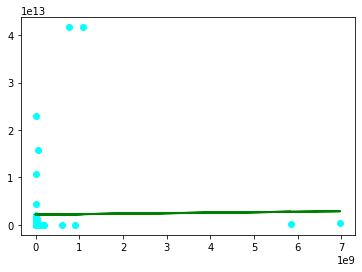

In [24]:
print('R-squared:', metrics.r2_score(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))



plt.scatter(x_test, y_test,  color='cyan')
plt.plot(x_test, y_pred, color='green', linewidth=2)
plt.show()